## Introducción al dataset

El Dataset ha sido extraído de kaggle, tenemos datos médicos sobre personas que han sufrido o no un infarto.</br>
Contamos con la siguientes columnas:</br></br>

Age : Edad del paciente

Sex : Sexo del paciente

trtbps : Presión arterial en descanso (en mmHg)

chol : Colesterol en mg/dl medido por un sensor de IMC

thalachh : Ritmo cardiaco máximo conseguido durante prueba de estrés

oldpeak: Depresión de onda ST inducida por ejercicio en descanso

caa: Número de vasos principales del corazón coloreados por fluoroscopia (0-4)

exang: Aparece angina inducida por el ejercicio
*  Valor 0: No
*  Valor 1: Si

cp : Tipo de dolor en el pecho
*  Valor 0: angina típica
*  Valor 1: angina atípica
*  Valor 2: dolor no anginal
*  Valor 3: asintomático

fbs : Nivel de azucar en sangre en ayuno
*  Valor 0: < 120 mg/dl
*  Valor 1: > 120 mg/dl

thall : Resultado de prueba de esfuerzo con Talio
* Valor 1: Defecto arreglado
* Valor 2: Normal
* Valor 3: Defecto reversible

rest_ecg : Resultado de electrocardiograma en reposo
*   Valor 0: normal
*   Valor 1: muestra anormalidades en el patron de onda ST-T (inversiones de onda T y/o elevación o depresión ST de > 0.05 mV)
* Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva, por el criterio de Estes

slp :  Pendiente mostrada por la onda ST durante electrocardiograma en prueba de esfuerzo
* Valor 0: Auge
* Valor 1: Plana
* Valor 2: Declive

target :
*   0 = menor posibilidad de infarto
*   1 = mayor posibilidad de infarto


## Importamos el dataset

In [90]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [91]:
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Manejo de datos missing


In [92]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Como podemos observar, de forma natural no hay valores missings en nuestro dataset.

## Manejo de datos categóricos



En el caso de mi dataset, las variables categóricas ya vienen codificadas en valores numéricos, sin embargo, voy a volver a codificarlas como categóricas, para demostrar cuál sería el proceso a seguir.

El primer paso a seguir es identificar las variables categóricas, las cuales son:


*   Sex
*   cp
* rest_ecg
* thall

Vamos a aprovechar, que con las variables cp y rest_ecg, es correcto utilizar la codificación one-hot, para demostrar cuál sería el proceso a seguir, en caso de tener que codificar variables categóricas como numéricas:



In [93]:
heart_categoricas = heart.copy()

heart_categoricas['cp'].replace([0, 1, 2, 3],
                        ['típica', 'atípica', 'no_anginal', 'asintomático'], inplace=True)
heart_categoricas['restecg'].replace([0, 1, 2],
                        ['normal', 'anormalidades_patron_onda_ST-T', 'hipertrofia_ventricular_izquierda'], inplace=True)
heart_categoricas['slp'].replace([0, 1, 2],
                        ['auge', 'plana', 'declive'], inplace=True)
heart_categoricas['thall'].replace([1, 2, 3],
                        ['defecto_arreglado', 'normal', 'defecto_reversible'], inplace=True)
heart_categoricas.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asintomático,145,233,1,normal,150,0,2.3,auge,0,defecto_arreglado,1
1,37,1,no_anginal,130,250,0,anormalidades_patron_onda_ST-T,187,0,3.5,auge,0,normal,1
2,41,0,atípica,130,204,0,normal,172,0,1.4,declive,0,normal,1
3,56,1,atípica,120,236,0,anormalidades_patron_onda_ST-T,178,0,0.8,declive,0,normal,1
4,57,0,típica,120,354,0,anormalidades_patron_onda_ST-T,163,1,0.6,declive,0,normal,1


A continuación, conseguimos los dummies de las variables

In [94]:
dummy_cp = pd.get_dummies(heart_categoricas["cp"], prefix="cp")
dummy_restecg = pd.get_dummies(heart_categoricas["restecg"], prefix="restecg")
dummy_slp = pd.get_dummies(heart_categoricas["slp"], prefix="slp_pendiente")
dummy_thall = pd.get_dummies(heart_categoricas["thall"], prefix="thall")

Este es el ejemplo de como quedaría una de nuestras variables, con codifcación one hot

In [95]:
dummy_cp.head(10)

,cp_asintomático,cp_atípica,cp_no_anginal,cp_típica
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


Una vez hecho eso, eliminamos de nuestro dataframe original las columnas correspondientes a esas variables, las reemplazamos por el dataframe que hemos creado con la codifiación one-hot ya realizada

In [96]:
heart_categoricas = heart_categoricas.drop(['cp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_cp], axis = 1)
heart_categoricas = heart_categoricas.drop(['restecg'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_restecg], axis = 1)
heart_categoricas = heart_categoricas.drop(['slp'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_slp], axis = 1)
heart_categoricas = heart_categoricas.drop(['thall'], axis = 1)
heart_categoricas= pd.concat([heart_categoricas, dummy_thall], axis = 1)

In [97]:
heart_categoricas.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_anormalidades_patron_onda_ST-T,restecg_hipertrofia_ventricular_izquierda,restecg_normal,slp_pendiente_auge,slp_pendiente_declive,slp_pendiente_plana,thall_0,thall_defecto_arreglado,thall_defecto_reversible,thall_normal
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,0,0,0,1
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,1,0,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,1,0,0,0,1,0,0,0,0,1


## Estandarizacion y normalizacion de los datos

Para empezar, vamos a mostrar todas nuestras variables de forma gráfica, y así estudiar su distribución

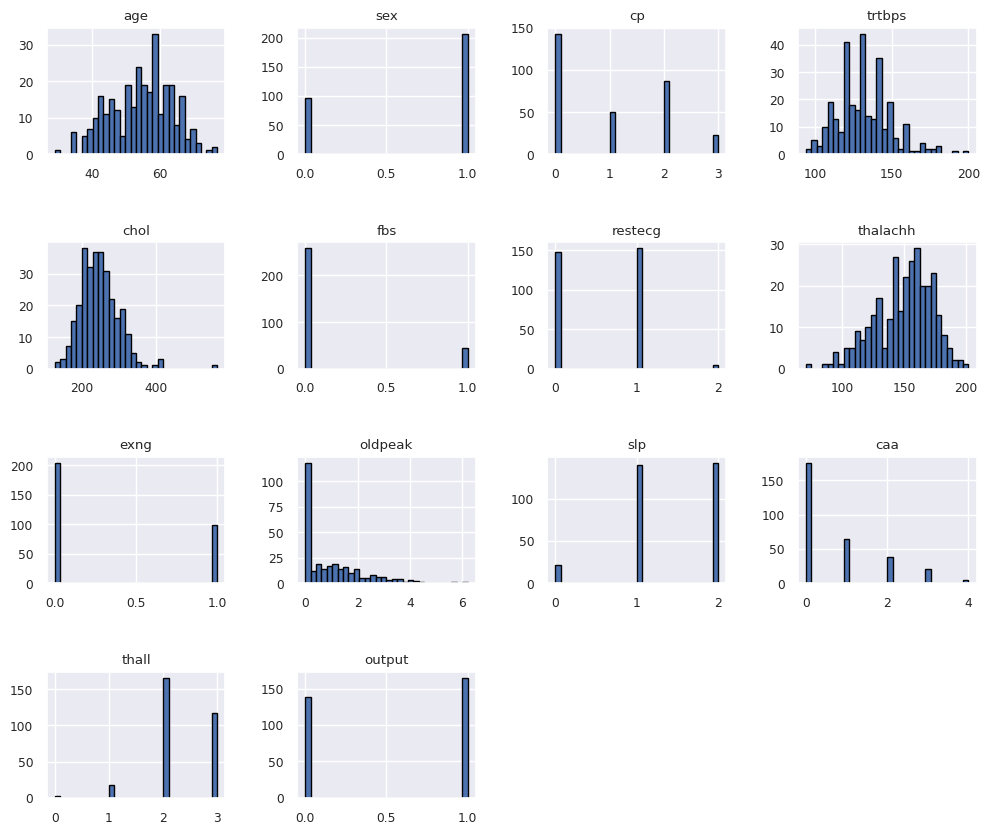

In [98]:
heart.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [99]:
heart_categoricas['chol'] = np.log(heart_categoricas['chol'])
heart_categoricas['trtbps'] = np.log(heart_categoricas['trtbps'])

Como ya hemos pasado por este proceso en anteriores trabajos con el mismo dataset, vamos a pasar directamente a hacer las transformaciones necesarias para mejorar la skewness y kurtosis de nuestras distintas variables

## Separación en entrenamiento y test

Preparamos los datos para separarlos en entrenamiento y test

In [100]:
heart_no_target = heart_categoricas.drop(columns=['output'])

X = heart_no_target.values

y = heart_categoricas['output']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[63.          0.          4.90527478 ...  0.          0.
   1.        ]
 [70.          1.          4.86753445 ...  0.          0.
   1.        ]
 [43.          1.          5.01063529 ...  0.          0.
   1.        ]
 ...
 [56.          1.          4.78749174 ...  0.          1.
   0.        ]
 [47.          1.          4.92725369 ...  0.          0.
   1.        ]
 [58.          1.          4.78749174 ...  0.          0.
   1.        ]]
[[70.          1.          4.97673374 ...  0.          1.
   0.        ]
 [64.          1.          5.13579844 ...  0.          1.
   0.        ]
 [59.          1.          5.13579844 ...  0.          1.
   0.        ]
 ...
 [47.          1.          4.86753445 ...  0.          0.
   1.        ]
 [59.          1.          5.09986643 ...  1.          0.
   0.        ]
 [62.          0.          4.92725369 ...  0.          0.
   1.        ]]
54     1
234    0
18     1
205    0
254    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: output,

## Normalización

Normalizamos utilizando StandardScaler

In [102]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_train_scaled = scaler_simple.fit_transform(X_train)
X_test_scaled = scaler_simple.transform(X_test)

# Aplicación y evaluación del modelo de clasificación


En este caso vamos a aplicar una máquina de soporte vectorial como modelo, porque es el que mejor rendimiento ha tenido cuando lo he utilizado con este dataset en prácticas anteriores

Primero creamos el objeto SVC y lo entrenamos con los datos de entrenamiento

In [103]:
# Create a SVC object
from sklearn.svm import SVC
classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0, C =1,  gamma = "auto")
classifierSVC.fit(X_train_scaled, y_train)

SVC(C=1, gamma='auto', probability=True, random_state=0)

A continuación hacemos predicciones en los datos de test

In [104]:
y_pred_SVC  = classifierSVC.predict(X_test_scaled)
print(y_pred_SVC)
print(y_test)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0]
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


## Evaluación con curva ROC

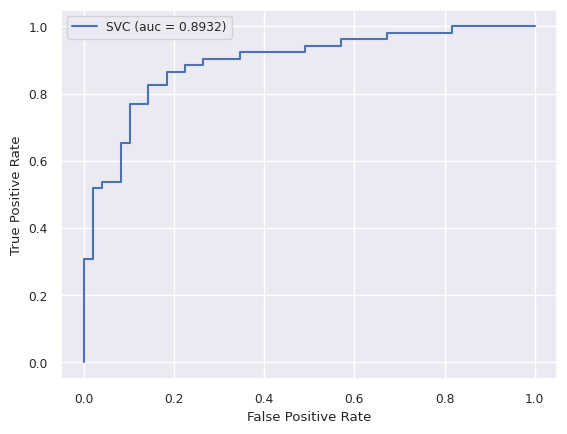

In [105]:
from sklearn.metrics import roc_curve, auc

# 3-Support Vector Classification
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Como podemos ver, obtenemos un AUC de 0.89, lo que significa que hemos tenido una precisión a la hora de realizar predecciones de un 87%.

## Evaluación con matriz de confusión

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")

print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")


CONFUSION MATRIX
CONF. MATRX.  (Support Vector Machine SVC): 
[[38 11]
 [ 7 45]]
 
ACCURACY
   ACC (Support Vector Machine SVC): 0.82
CLASSIFICATION_REPORT
CLSS_REPORT (Support Vector Machine SVC): 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.87      0.83        52

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

 


En cuanto a la matriz de confusión, obtenemos una precisión de un 84% para los pacientes que no sufre una posibilidad de infarto aumentada, y un 80% para los que si.

Ya que estamos ante un problema de diagnóstico de salud, valoramos bastante que nuestro algoritmo que tenga un bajo ratio de falsos negativos, pues clasificar como "sano" a un paciente que potencialmente puede sufrir de un infarto, es mucho más peligroso que clasificar como enfermo a un paciente que realmente no tiene una probabilidad aumentada de sufrirlo.

# Análisis de correlación


Empezamos relizando un análisis de correlación de nuestras variables con la variable objetivo.

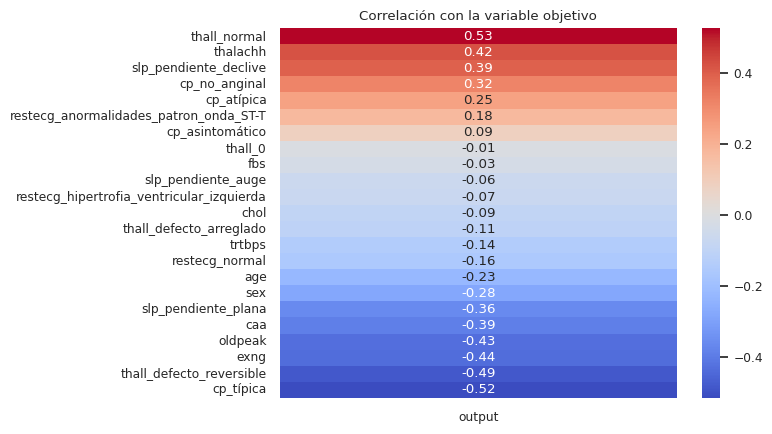

In [107]:
corr = heart_categoricas.corr()
target_corr = corr['output'].drop('output')

# Ponemos los valores de correlacion en orden descendente
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlación con la variable objetivo')
plt.show()

A continuación vamos a realizar un análsis de correlación entre todas nuestras variables

<Axes: >

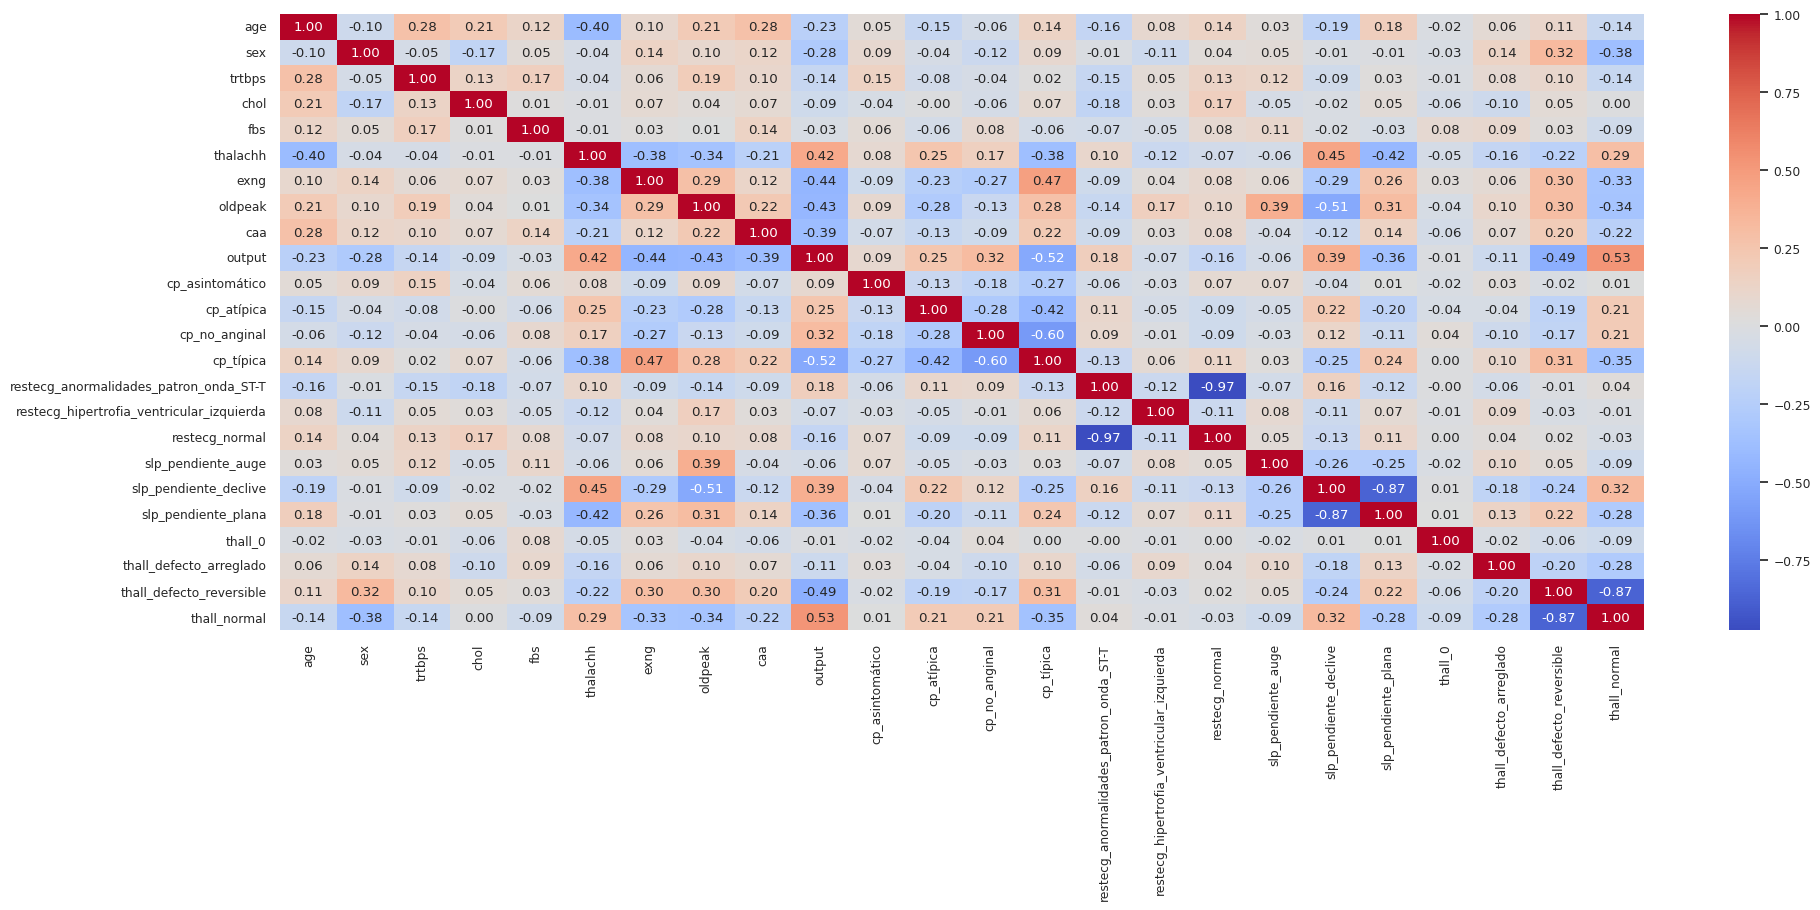

In [108]:
fig, ax = plt.subplots(figsize = (22, 8))

sns.heatmap(heart_categoricas.corr(), annot=True, fmt = '.2f', cmap="coolwarm")

Cuando tenemos en cuenta los datos de los dos anteriores gráficos en conjunto, podemos llegar a las siguientes conclusiones:

Podemos ver que la correlación entre las variables restecg_normal y restecg_anormalidades_patron_onda_ST-T es de -0.97, por lo que podríamos prescindar de una de las dos. En estos casos es mejor prescindir de la variable que menos correlación tenga con la objetivo, en el caso de restecg_normal la correlacion es de -0.16, y la de restecg_anormalidades_patron_onda_ST-T de 0.18, así que vamos a prescindir de la variable restecg_normal.

Observamos algo parecido con thall_normal y thall_defecto_reversible, cuya correlación es de -0.87, thall_normal tiene una correlacion con la variable objetivo de 0.53, y thall_defecto_reversible tiene una correlación de -0.49.
Como en este caso ambas variables tienen una correlación bastante elevada con la objetivo, vamos a conservar las dos.

Pasa lo mismo con slp_pendiente_declive y slp_pendiente_plana, cuya correlación es de -0.87, slp_pendiente_declive tiene una correlacion con la variable objetivo de 0.39, y slp_pendiente_plana tiene una correlación de -0.36.
Como ambas variables tienen una correlación elevada con la objetivo, vamos a conservar las dos.


En cuanto a correlación directa con la variable objetivo, podemos ver que fbs y slp_pendiente_auge, tienen una correlación con la variable objetivo muy baja, asi que también podríamos prescindir de ellas, ya que no serán muy útiles para nuestro modelo.

Las variables con más correlación positiva con la objetivo son:
thall_normal y thalachh, con 0.53 y 0.42 respectivamente

Las variables con más correlación negativa con la objetivo son:
cp_típica y thall_defecto reversible, con -0.52 y -0.49 respectivamente


Podríamos a prescindir de las variables : fbs, slp_pendiente_auge y thall_0


In [109]:
#Comento esta línea porque quiero mostrar como se realizaría el proceso, pero no ejecutarlo de forma erronea
#heart_categoricas.drop(['fbs', 'slp_pendiente_auge', 'thall_0'], axis=1, inplace=True)

# Cómo elegir un modelo de selección de variables?

How do we know which feature selection model will work out for our model? The process is relatively simple, with the model depending on the types of input and output variables.

Variables are of two main types:



*   Numerical Variables: Which include integers, float, and numbers.
*   Categorical Variables: Which include labels, strings, boolean variables, etc.



Based on whether we have numerical or categorical variables as inputs and outputs, we can choose our feature selection model as follows:

<table><tbody>
<tr>
<td>
<p>Input Variable</p>
</td>
<td>
<p>Output Variable</p>
</td>
<td>
<p>Feature Selection Model</p>
</td>
</tr>
<tr>
<td>
<p>Numerical</p>
</td>
<td>
<p>Numerical</p>
</td>
<td>
<ul>
<li aria-level="1">Pearson’s correlation coefficient</li>
<li aria-level="1">Spearman’s rank coefficient</li>
</ul>
</td>
</tr>
<tr>
<td>
<p>Numerical</p>
</td>
<td>
<p>Categorical</p>
</td>
<td>
<ul>
<li aria-level="1">ANOVA correlation coefficient (linear).</li>
<li aria-level="1">Kendall’s rank coefficient (nonlinear).</li>
</ul>
</td>
</tr>
<tr>
<td>
<p>Categorical</p>
</td>
<td>
<p>Numerical</p>
</td>
<td>
<ul>
<li aria-level="1">Kendall’s rank coefficient (linear).</li>
<li aria-level="1">ANOVA correlation coefficient (nonlinear).</li>
</ul>
</td>
</tr>
<tr>
<td>
<p>Categorical</p>
</td>
<td>
<p>Categorical</p>
</td>
<td>
<ul>
<li aria-level="1">Chi-Squared test (contingency tables).</li>
<li aria-level="1">Mutual Information.</li>
</ul>
</td>
</tr>
</tbody></table>

# Importancia de variables

Primero creamos el objeto DecissionTreeClassifier y lo entrenamos con los datos de entrenamiento

In [110]:
# Create a DTC object
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

A continuación hacemos predicciones en los datos de test

In [111]:
y_pred_classifierTree  = classifierTree.predict(X_test_scaled)
print(y_pred_classifierTree)
print(y_test)

[1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0]
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


Obtenemos la importancia de las distintas variables:

In [112]:
importance_dt = classifierTree.feature_importances_
importance_dt

array([0.08485473, 0.01377869, 0.0432035 , 0.08300286, 0.        ,
       0.10443436, 0.        , 0.07685256, 0.10365405, 0.01328764,
       0.        , 0.01377869, 0.10665143, 0.02627092, 0.        ,
       0.        , 0.01623058, 0.01610138, 0.03885708, 0.        ,
       0.        , 0.        , 0.25904154])

Vamos a mejorar un poco la forma de mostrar la importancia de cada variable

In [113]:
feature_names = heart_no_target.keys()

feature_importance_dict = dict(zip(feature_names, importance_dt))

feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

In [114]:
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
22,thall_normal,0.259042
12,cp_típica,0.106651
5,thalachh,0.104434
8,caa,0.103654
0,age,0.084855
3,chol,0.083003
7,oldpeak,0.076853
2,trtbps,0.043203
18,slp_pendiente_plana,0.038857
13,restecg_anormalidades_patron_onda_ST-T,0.026271


Como podemos observar, las variables más importantes para el modelo de Árboles de decisión
son:

thall_normal, cp_típica, thalachh y age

 Además podemos observar que tenemos muchas variables a las que se le asigna una importancia de 0

## Comparación con el punto anterior

Podemos observar resultados bastante parecidos para los dos métodos utilizados.

**Las variables que tienen una alta importancia en los dos métodos son:**

thall_normal, cp_típica, thalachh, caa, oldpeak, age



---


**Las variables que parecen importantes con un método pero con otro no son:**

slp_pendiente_declive, cp_no_anginal, thall_defecto_reversible, exng, chol


---


**Las variables que no parecen ser muy importantes en ambos métodos son las siguientes:**
thall_0, fbs, restecg_hipertrofia_ventricular_izquierda

Al comparar estos dos métodos, observo que los árboles de decisión tienden a  despreciar la importancia de las variables que tienen un índice de correlación negativa con la variable objetivo especialmente las, comprendidas entre el -0.2 y -0.4

Las variables con alta correlación con la variable objetivo, ya sea negativa o positiva, si coinciden en los dos métodos.

Como conclusión saco que este método nos podría servir si queremos realizar un estudio automático y no muy exhaustivo de las variables con alta importancia.

# Univariante Selección

In [115]:
from sklearn.feature_selection import SelectKBest, f_classif

# k es el número de variables que queremos conservar
test = SelectKBest(score_func=f_classif, k=10)
test.fit(X_train_scaled, y_train)
importance_kbest = test.scores_

In [116]:
feature_importance_dict_kbest = dict(zip(feature_names, importance_kbest))

feature_importance_df_kbest = pd.DataFrame(list(feature_importance_dict_kbest.items()), columns=['Feature', 'Importance'])


In [117]:
feature_importance_df_kbest.sort_values(by='Importance', ascending=False)

,Feature,Importance
22,thall_normal,101.031245
21,thall_defecto_reversible,72.211514
12,cp_típica,68.178114
6,exng,51.969602
7,oldpeak,51.235382
5,thalachh,42.287317
8,caa,41.148124
17,slp_pendiente_declive,34.306434
1,sex,30.612290
18,slp_pendiente_plana,27.561150


Como podemos ver, este método si devuelve índices de importancia de variable mucho más parecidos a nuestro análisis de correlaciones.

He observado comparando con mi análisis de correlación, que ordenar las variables por importancia, casi de la misma manera, teniendo en cuenta la correlación con variable objetivo, como valor absoluto. Es decir que no parece tener un sesgo hacia variables con correlación negativa o positiva.

# Eliminación recursiva de variables



Para este punto he decidido realizar un RFE con validación cruzada, que nos indicará de forma automática la cantidad de variables óptima

In [118]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1 #número mínimo de variables
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X_train_scaled, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), n_jobs=2, scoring='accuracy')

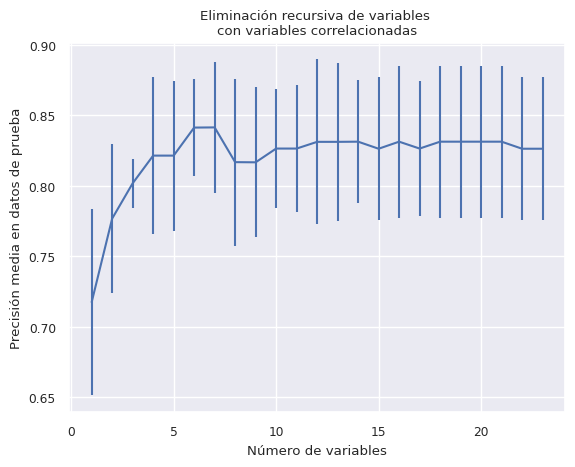

In [119]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Número de variables")
plt.ylabel("Precisión media en datos de prueba")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Eliminación recursiva de variables \ncon variables correlacionadas")
plt.show()

In [120]:
selected_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Support': rfecv.support_,
    'Ranking': rfecv.ranking_.tolist()
})

# Filter the DataFrame to include only features with rfecv.support_ as True
selected_features_df = selected_features_df[selected_features_df['Support']]

selected_features_df

,Feature,Support,Ranking
1,sex,True,1
3,chol,True,1
5,thalachh,True,1
7,oldpeak,True,1
8,caa,True,1
12,cp_típica,True,1
21,thall_defecto_reversible,True,1


Como podemos ver, el algoritmo en este caso ha decidido que deberíamos quedarnos con las variables: sex, chol, thalachh, oldpeak, caa, cp_típica y thall_defecto_reversible

## Visualización de datos

A continuación vamos a visualizar los datos. Nos encontramos el siguiente problema: podemos graficar un máximo de 3 variables, pero nuestro algoritmo ha detectado que la cantidad óptima es 7, para arreglar esto, vamos a voler a realizar un RFECV con un número máximo de variables igual a 3.

In [121]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=clf, n_features_to_select=3)
rfe.fit(X_train_scaled, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [122]:
three_selected_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Support': rfe.support_,
    'Ranking': rfe.ranking_.tolist()
})

# Filter the DataFrame to include only features with rfecv.support_ as True
three_selected_features_df = three_selected_features_df[three_selected_features_df['Support']]

three_selected_features_df

,Feature,Support,Ranking
7,oldpeak,True,1
12,cp_típica,True,1
21,thall_defecto_reversible,True,1


### Gráfico con variables elegidas por RFE

Identificamos oldpeak, cp_típica y thall_defecto_reversible como las 3 variables más importantes

Pasamos a la visualización

In [123]:
import plotly.express as px
fig = px.scatter_3d(heart_categoricas, x='oldpeak', y='cp_típica', z='thall_defecto_reversible', color='output')
fig.show()

Como podemos ver, en este caso obtenemos un gráfico bastante malo, lo cual era de esperar, ya que hemos reducido el número de variables importantes de 7, a 3. Además tenemos muchas variables categóricas

Además, le veo un problema a este método RFE, y es que estamos obligados a utilizar un modelo que devuelva información sobre la importancia de variable. En este caso nos hemos visto obligados a utilizar un modelo de Regresión Lineal, a pesar de que sabemos que hay otros modelos que funcionan mejor con nuestro dataset, pero no son compatibles con este método.

### Gráfico con variables elegidas por análisis de correlación

In [124]:
import plotly.express as px
fig = px.scatter_3d(heart_categoricas, x='thall_normal', y='cp_típica', z='thall_defecto_reversible', color='output')
fig.show()

Este gráfico tampoco nos aclara mucho, ya que las 3 variables son categóricas

# Eliminación de variables correlacionadas y comparación de resultados con el modelo anterior

Este punto lo vamos a realizar con las 7 variables que ha elegido neustro algoritmo RFECV


In [125]:
selected_columns = ['sex', 'chol', 'thalachh', 'oldpeak', 'caa', 'cp_típica', 'thall_defecto_reversible']
dataset_sin_correlacionadas = heart_categoricas[selected_columns]

In [126]:
X_sin_correlacionadas = dataset_sin_correlacionadas.values

y_sin_correlacionadas = heart_categoricas['output']

from sklearn.model_selection import train_test_split
X_train_sin_correlacionadas, X_test_sin_correlacionadas, y_train_sin_correlacionadas, y_test_sin_correlacionadas = train_test_split(X_sin_correlacionadas, y_sin_correlacionadas, test_size = 1/3, random_state = 0)

scaler_simple_sin_correlacionadas = StandardScaler()
X_train_scaled_sin_correlacionadas = scaler_simple_sin_correlacionadas.fit_transform(X_train_sin_correlacionadas)
X_test_scaled_sin_correlacionadas = scaler_simple_sin_correlacionadas.transform(X_test_sin_correlacionadas)

In [127]:
classifierSVC_sin_correlacionadas = SVC(kernel = "rbf", probability=True, random_state = 0, C =1,  gamma = "auto")
classifierSVC_sin_correlacionadas.fit(X_train_scaled_sin_correlacionadas, y_train_sin_correlacionadas)

SVC(C=1, gamma='auto', probability=True, random_state=0)

In [128]:
y_pred_SVC_sin_correlacionadas  = classifierSVC_sin_correlacionadas.predict(X_test_scaled_sin_correlacionadas)
print(y_pred_SVC_sin_correlacionadas)
print(y_test_sin_correlacionadas)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0]
225    0
152    1
228    0
201    0
52     1
      ..
247    0
288    0
156    1
297    0
252    0
Name: output, Length: 101, dtype: int64


## Comparación de resultados con matriz de confusión

In [129]:
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC con RFECV): ")
print( confusion_matrix(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )
print(" ")


# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Support Vector Machine SVC con RFECV): %.2f" % accuracy_score(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")

print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC con RFECV): ")
print( classification_report(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )
print(" ")


CONFUSION MATRIX
CONF. MATRX.  (Support Vector Machine SVC): 
[[38 11]
 [ 7 45]]
 
CONF. MATRX.  (Support Vector Machine SVC con RFECV): 
[[39 10]
 [ 7 45]]
 
ACCURACY
   ACC (Support Vector Machine SVC): 0.82
   ACC (Support Vector Machine SVC con RFECV): 0.83
CLASSIFICATION_REPORT
CLSS_REPORT (Support Vector Machine SVC): 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.87      0.83        52

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

 
CLSS_REPORT (Support Vector Machine SVC con RFECV): 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        49
           1       0.82      0.87      0.84        52

    accuracy                           0.83       101
   macro avg       0.83      0.83      0.83       101
weighted avg       

En este caso como podemos ver, la matriz de confusión parece indicar que nuestro dataset con solo las 7 variables más importantes definidas por RFECV, es muy ligeramente más preciso que nuestro dataset original, tanto para los casos en los que el paciente sufre un riesgo aumentado de infarto, como en los que no

## Comparación de resultados con curva ROC

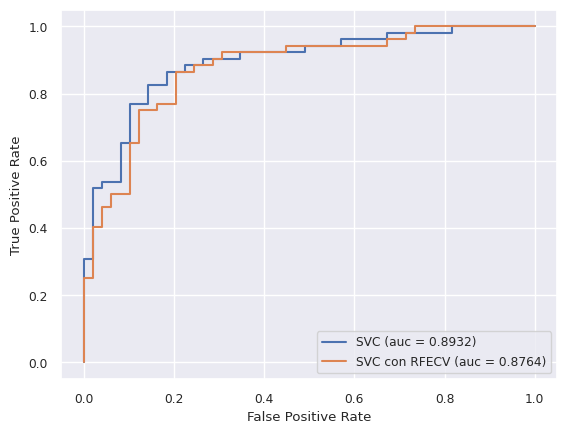

In [130]:
#Datos sin eliminar variables con correlación alta
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Datos después de eliminar variables con correlación alta
y_prob_SVC_sin_correlacionadas   = classifierSVC_sin_correlacionadas.predict_proba(X_test_scaled_sin_correlacionadas)
SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, threshold_sin_correlacionadas = roc_curve(y_test_sin_correlacionadas, y_prob_SVC_sin_correlacionadas[:, 1])
auc_SVC_sin_correlacionadas = auc(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas)
plt.plot(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, linestyle='-', label='SVC con RFECV (auc = %0.4f)' % auc_SVC_sin_correlacionadas)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()

plt.show()

Como podemos ver, el valor AUC para nuestro dataset con solo las 7 variables más importantes definidas por RFECV tan solo pierde un 0.0168 de precisión

# Reducción de la dimensionalidad PCA

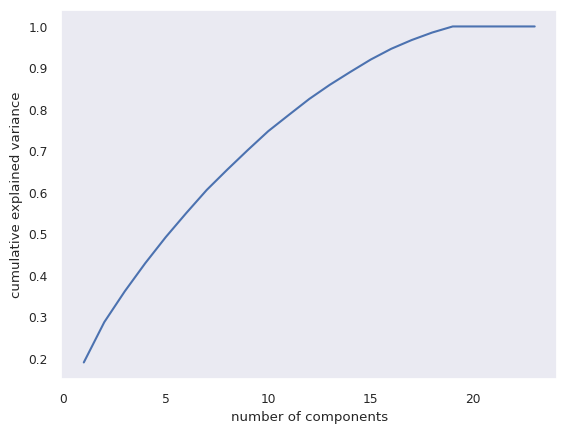

In [131]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
pca = pca.fit(X_train_scaled)
cum_expvar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cum_expvar)+1),cum_expvar)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [132]:
print(pca.explained_variance_ratio_)
print(cum_expvar)

[1.90804830e-01 9.71384462e-02 7.42305133e-02 6.77940331e-02
 6.27688934e-02 5.78937923e-02 5.57053625e-02 4.88099078e-02
 4.71349481e-02 4.55496775e-02 3.89939882e-02 3.85258316e-02
 3.40250684e-02 3.09732012e-02 2.99539112e-02 2.58739921e-02
 2.11321317e-02 1.80719723e-02 1.46194988e-02 5.66317037e-33
 3.56689506e-33 3.13727060e-33 3.99619790e-34]
[0.19080483 0.28794328 0.36217379 0.42996782 0.49273672 0.55063051
 0.60633587 0.65514578 0.70228073 0.7478304  0.78682439 0.82535022
 0.85937529 0.89034849 0.9203024  0.9461764  0.96730853 0.9853805
 1.         1.         1.         1.         1.        ]


In [133]:
pca = PCA(n_components=2)
heart_projected_train = pca.fit_transform(X_train_scaled)
heart_projected_test = pca.transform(X_test_scaled)

In [134]:
heart_projected_train.shape

(202, 2)

In [135]:
heart_projected_test.shape

(101, 2)

Entrenamos otro clasificador con el dataset reducido

In [136]:
classifierSVC_reducido = SVC(kernel = "rbf", probability=True, random_state = 0, C =1,  gamma = "auto")
classifierSVC_reducido.fit(heart_projected_train, y_train)

SVC(C=1, gamma='auto', probability=True, random_state=0)

(493544, 2)
(646, 764)


<ipython-input-137-af28f19bc1c9>:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



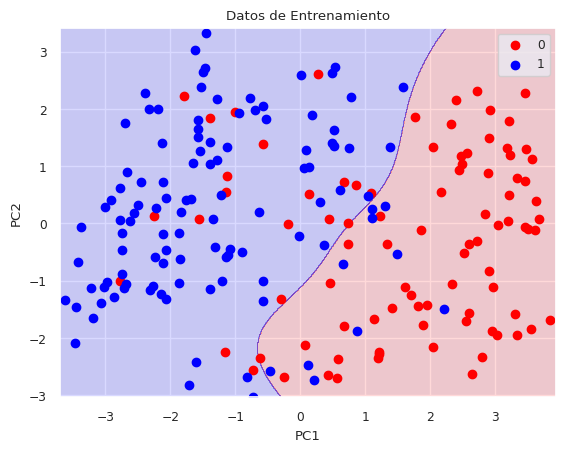

In [137]:
# Plotting the meshgrid
from matplotlib.colors import ListedColormap
X_set = heart_projected_train
y_set =  y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()+0.1, stop = X_set[:, 0].max()+0.1 , step = 0.01),
                     np.arange(start = X_set[:, 1].min()+0.0 , stop = X_set[:, 1].max()+0.1 , step = 0.01))
X_meshgrid=np.array([X1.ravel(), X2.ravel()]).T
print(X_meshgrid.shape)
print(X1.shape)

plt.contourf(X1, X2, classifierSVC_reducido.predict(X_meshgrid).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the training data results
for  i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Datos de Entrenamiento')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



(488047, 2)
(617, 791)


<ipython-input-138-b4b3b9ce8aec>:19: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



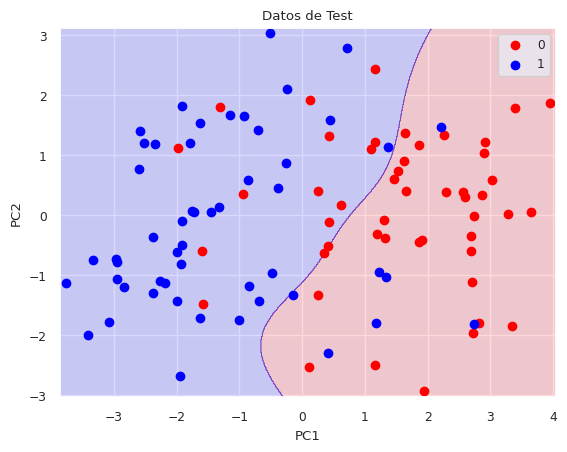

In [138]:
# Plotting the meshgrid
from matplotlib.colors import ListedColormap
X_set = heart_projected_test
y_set =  y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-0.1, stop = X_set[:, 0].max()+0.1 , step = 0.01),
                     np.arange(start = X_set[:, 1].min()-0.1 , stop = X_set[:, 1].max()+0.1 , step = 0.01))
X_meshgrid=np.array([X1.ravel(), X2.ravel()]).T
print(X_meshgrid.shape)
print(X1.shape)

plt.contourf(X1, X2, classifierSVC_reducido.predict(X_meshgrid).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the training data results
for  i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Datos de Test')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



# Nueva aplicación del modelo a los datos con PCA

In [139]:
y_pred=classifierSVC_reducido.predict(heart_projected_test)

## Comparación con Matriz de confusión

In [140]:
# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX.  (Support Vector Machine SVC Completo): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC Reducido): ")
print(confusion_matrix(y_test, y_pred))
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC con RFECV): ")
print( confusion_matrix(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Support Vector Machine SVC Completo): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Support Vector Machine SVC Reducido): %.2f" % accuracy_score(y_test, y_pred) )
print("   ACC (Support Vector Machine SVC con RFECV): %.2f" % accuracy_score(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")

print("CLSS_REPORT (Support Vector Machine SVC Completo): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC Reducido): ")
print( classification_report(y_test, y_pred) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC con RFECV): ")
print( classification_report(y_test_sin_correlacionadas, y_pred_SVC_sin_correlacionadas) )
print(" ")



CONFUSION MATRIX
CONF. MATRX.  (Support Vector Machine SVC Completo): 
[[38 11]
 [ 7 45]]
 
CONF. MATRX.  (Support Vector Machine SVC Reducido): 
[[34 15]
 [ 7 45]]
 
CONF. MATRX.  (Support Vector Machine SVC con RFECV): 
[[39 10]
 [ 7 45]]
 
ACCURACY
   ACC (Support Vector Machine SVC Completo): 0.82
   ACC (Support Vector Machine SVC Reducido): 0.78
   ACC (Support Vector Machine SVC con RFECV): 0.83
CLASSIFICATION_REPORT
CLSS_REPORT (Support Vector Machine SVC Completo): 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.87      0.83        52

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101

 
CLSS_REPORT (Support Vector Machine SVC Reducido): 
              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.75      0

## Comparación con curva ROC

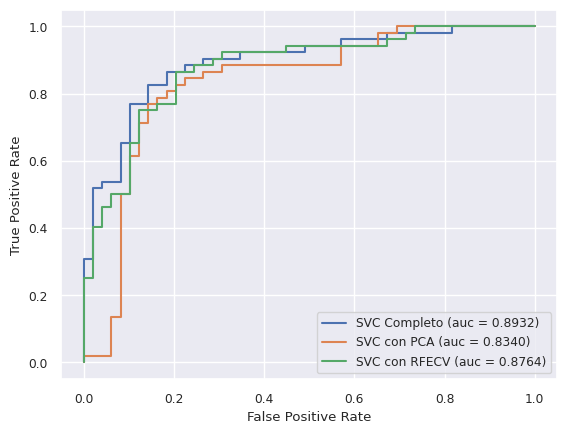

In [141]:
#Daos del dataset original
y_prob_SVC  = classifierSVC.predict_proba(X_test_scaled)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC Completo (auc = %0.4f)' % auc_SVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Datos después de aplicar PCA
y_prob_SVC_PCA   = classifierSVC_reducido.predict_proba(heart_projected_test)
SVC_fpr_PCA, SVC_tpr_PCA, threshold_PCA = roc_curve(y_test, y_prob_SVC_PCA[:, 1])
auc_SVC_PCA = auc(SVC_fpr_PCA, SVC_tpr_PCA)
plt.plot(SVC_fpr_PCA, SVC_tpr_PCA, linestyle='-', label='SVC con PCA (auc = %0.4f)' % auc_SVC_PCA)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#Datos después de eliminar las variables altamente correlacionadas
y_prob_SVC_sin_correlacionadas   = classifierSVC_sin_correlacionadas.predict_proba(X_test_scaled_sin_correlacionadas)
SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, threshold_sin_correlacionadas = roc_curve(y_test_sin_correlacionadas, y_prob_SVC_sin_correlacionadas[:, 1])
auc_SVC_sin_correlacionadas = auc(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas)
plt.plot(SVC_fpr_sin_correlacionadas, SVC_tpr_sin_correlacionadas, linestyle='-', label='SVC con RFECV (auc = %0.4f)' % auc_SVC_sin_correlacionadas)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()

plt.show()

# Conclusion

Como podemos ver, los datos a los que hemos aplicado RFECV han funcionado mejor que los datos a los que hemos PCA, aunque no por mucho.


 Tanto los datos con PCA como con RFECV no muestran una disminución drástica de rendimiento.

Ante esto, podemos sacar la conclusión de que aplicaremos un método u otro dependiendo de nuestras necesidades, pues PCA tiene un funcionamiento más parecido a una caja negra, ya que no conocemos cuales de nuestras variables originales hemos conservado, mientras que con RFECV si.

Además cabe destacar que todos estos métodos siempre tendrán un peor funcionamiento, que realizar un análisis exhaustivo de las variables que mejor funcionan, a través de gráficos, junto con métodos de evaluación del dataset.

Por último, una pequeña desventaja que tienen estos métodos de reducción de dimensionalidad, es que necesitan ser usados con algoritmos que devuelvan valores evaluables, y esto puede llegar a ser perjudicial, en caso de que haya otros métodos que no tengan esta opción, y que tengan un mejor funcionamiento con nuestro dataset.